In the following code, we visually demonstrate the impact of sampling on the Discrete Fourier Transform (DFT) using a sine wave as a base example. The code allows users to additionally analyze a second sine wave, or a waveform generated through amplitude modulation (AM), frequency modulation (FM), or the sum or combination of both sine waves. Dotted lines in the plots represent the time steps or sampling intervals.

config for nyquist/phase showcase: 

config = {
    'time': {'n': 0.05, 't_max': 2.0},
    'waveforms': {'selected': ['sine1', 'sine2', 'sum']},
    'sine1': {'amp': 1.0, 'freq': 5, 'phase': 0*np.pi/2},
    'sine2': {'amp': 1.0, 'freq': 15, 'phase': 0*np.pi/2},
    'modulation': {'index_am': 1, 'index_fm': 1},
    'window': {'apply': False, 'type': 'blackman'},
    'overlay': {'dotted_lines': False}
}

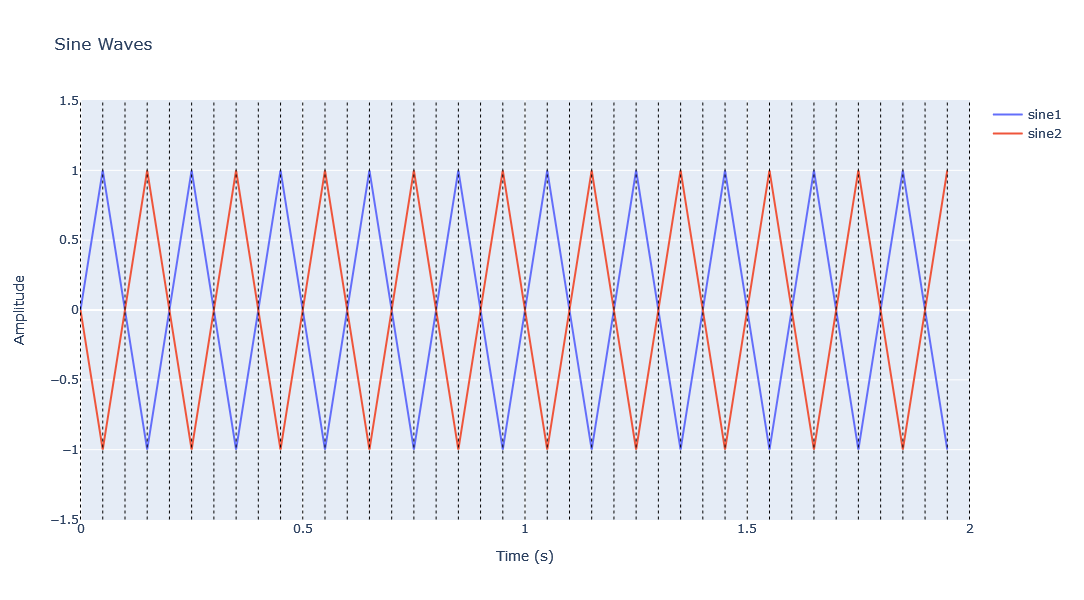

Sampling rate: 20.0 Hz
Nyquist frequency: 10.0 Hz
Total number of available sample points: 40
Frequency Resolution: 0.5 Hz


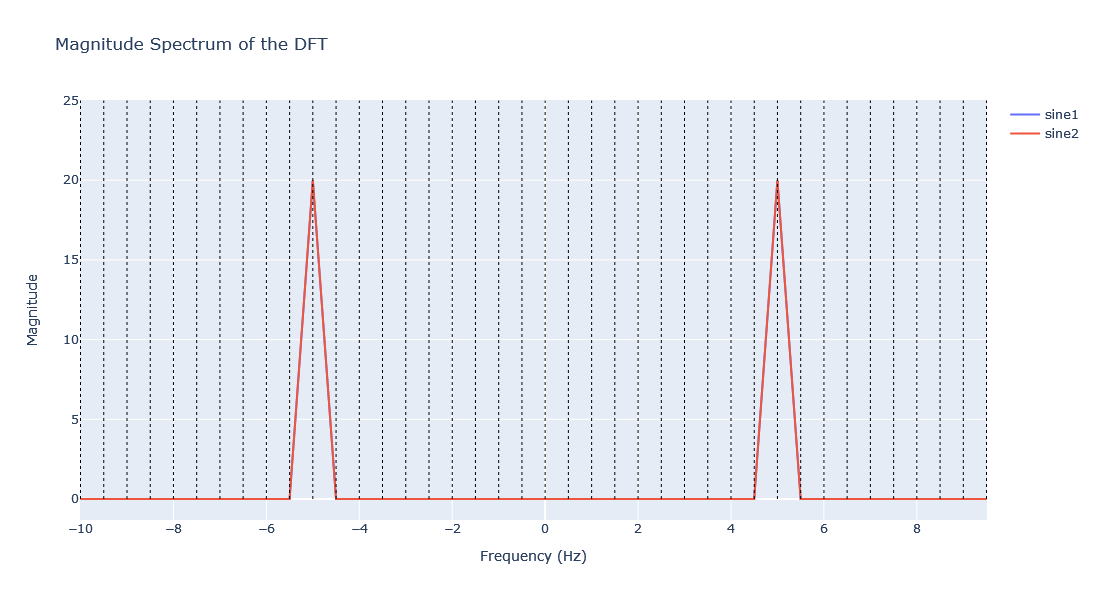

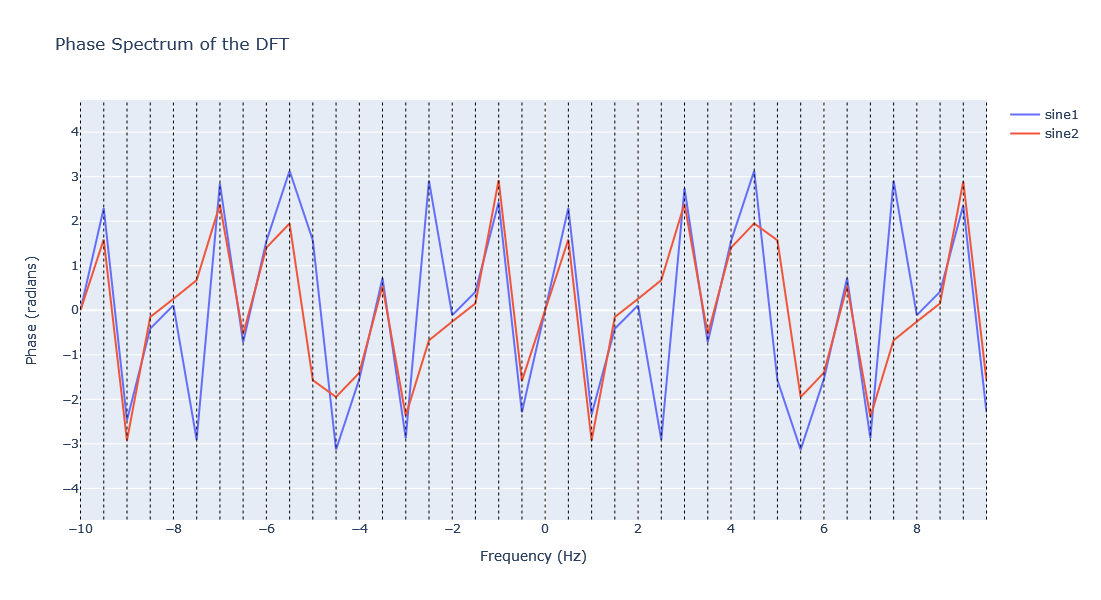

In [7]:
import numpy as np
import plotly.graph_objects as go
from waveform_utils import generate_waveforms, apply_window_to_waveforms, plot_waveforms

# Configuration
config = {
    # Time step
    'n': 0.05, 
    
    # Maximum time
    't_max': 2.0, 
    
    # Waveforms to show as list: 'sine1', 'sine2', 'am', 'fm', 'sum', 'comb'
    'selected_waveforms': ['sine1', 'sine2'],
    
    # Parameters for sine wave 1: amp, freq, phase
    'amp1': 1.0, 'freq1': 5, 'phase1': 0*np.pi/2,
    
    # Parameters for sine wave 2: amp, freq, phase
    'amp2': 1.0, 'freq2': 15, 'phase2': 0*np.pi/2,
    
    # Set the modulation index for AM
    'index_am': 1,
    
    # Set the modulation index for FM
    'index_fm': 1,
    
    # Apply window function
    'apply_window': False,
    
    # Type of window function to apply. Reference here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html
    'window_type': 'blackman',
    
    # Add dotted lines overlay (disable if using high SR!)
    'add_dotted_lines': True
}

waveform_data = generate_waveforms(config)

if config['apply_window']:
    waveform_data = apply_window_to_waveforms(waveform_data, config['window_type'])

plot_waveforms(waveform_data, config)


Save or preview your audio output here:

In [24]:
import numpy as np
from generate_wave_file import generate_wave_file
from IPython.display import Audio
from datetime import datetime 

sample_rate = 1 / config['n']

# Flags to control behavior
player = True
save_audio = False

for waveform in config['selected_waveforms']:
    # Extract data for the current waveform
    y_current = waveform_data[waveform]
    
    # Convert any NaN values to 0
    y_current_no_nan = np.nan_to_num(y_current)
    
    # Ensure y_current_no_nan is two-dimensional if needed
    y_current_no_nan = y_current_no_nan.reshape(-1, 1)
    
    if save_audio:
        # Generate a custom filename for each waveform
        custom_name = f"{waveform}_{sample_rate}Hz_{datetime.now().strftime('%H_%M_%S')}.wav"
        file_path = generate_wave_file(y_current_no_nan, sample_rate, fs_target_name='44.1kHz', bit_rate=24, custom_filename=custom_name)
        if player:
            print(f"Playing waveform: {waveform}")
            audio = Audio(filename=file_path)
            display(audio)
    else:
        y_playback, fs_playback = generate_wave_file(y_current_no_nan, sample_rate, fs_target_name='44.1kHz', bit_rate=24, save_to_file=False)
        if player:
            print(f"Playing waveform: {waveform}")
            audio = Audio(y_playback.flatten(), rate=fs_playback)
            display(audio)


[2023-09-16 13:39:54] 24-bit wave file with 44.1kHz sampling rate saved successfully to: C:\Users\egor_\Desktop\tests\audiospylt\rendered_audio\sine1_500.0Hz_13_39_54.wav
Playing waveform: sine1


[2023-09-16 13:39:55] 24-bit wave file with 44.1kHz sampling rate saved successfully to: C:\Users\egor_\Desktop\tests\audiospylt\rendered_audio\sine2_500.0Hz_13_39_55.wav
Playing waveform: sine2
